In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ROSHAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
df = pd.read_csv('E:\Rohan\Datasets\Digital Cognition Internship\Marketing Mix Modelling\Advertising.csv')

In [14]:
df.shape

(200, 5)

In [15]:
df = df.iloc[:,1:]


In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.shape

(200, 4)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Linear Regression

In [19]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


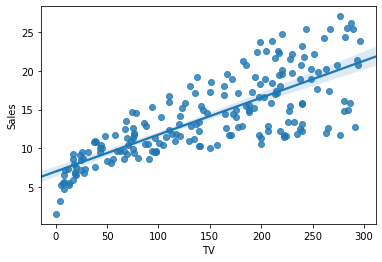

In [20]:
sns.regplot(df['TV'] , df['Sales'])

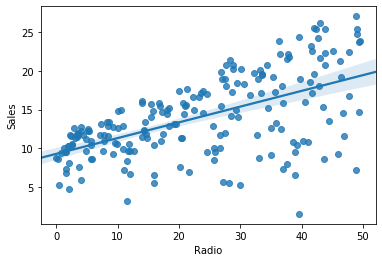

In [37]:
sns.regplot(df['Radio'] , df['Sales'])

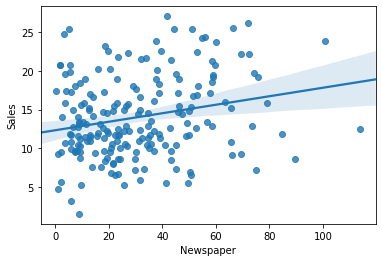

In [38]:
sns.regplot(df['Newspaper'] , df['Sales'])

In [25]:

regr = skl_lm.LinearRegression()

X = df['TV'].values.reshape(-1,1)
y = df['Sales']

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


Y = B0 + B1*X

 Here, B0 (Intercept)          --> 7.0325
       B1 (Coefficient for TV) --> 0.0475

# Linear Regression For Each Of the Individual Parameters

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('Sales ~ Radio', df).fit()  #Ordinary Least Squares
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [40]:
est = smf.ols('Sales ~ Newspaper', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


# Multiple Linear Regression

In [28]:
X = df[['Radio', 'TV']]
y = df['Sales']

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.921099912405138


In [29]:
df[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


# Using Statsmodel

In [36]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011
